In [1]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from PIL import Image
import os
import math
from tqdm import tqdm_notebook
from glob import glob

In [2]:
def plot_channel(img):
    n_channel = img.shape[-1]
    fig, ax = plt.subplots(1, n_channel+1)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    ax[0].imshow(img)
    for i in range(n_channel):
        ax[i+1].imshow(img[:,:,i],cmap='gray')
    return fig, ax

def plot_hist(img, remove=None,num_bins=None):
    n_channel = img.shape[-1]
    if num_bins is None:
        num_bins = np.ones([n_channel],dtype=np.uint8)*100
    if type(num_bins) is int:
        num_bins = np.ones([n_channel],dtype=np.uint8)*num_bins
    plt.figure(figsize=(20,4))
    for i in range(n_channel):
        x = img[:,:,i].reshape(-1)
        if remove is not None:
            if type(remove) is int:
                x=x[x!=remove]
            else:
                x=x[x!=remove[i]]
        plt.subplot(1,n_channel,i+1)
        n, bins, patches = plt.hist(x, num_bins[i], facecolor='blue', alpha=0.5)
        plt.title('Mean: {:.2f}'.format(x.mean()))
    plt.show()
def color_constancy(img,verbose=True,preserve_range=True):
    e = np.zeros([3])
    for i in range(3):
        x = img[:,:,i]
        x=x[x!=0]
        e[i]=x.mean()
    print('channel means',e)
    e=e/math.sqrt(sum(e*e))
    print('illumination estimate',e)
    d=1/(math.sqrt(3)*e)
    print('correction coefficient',d)
#     print(d)
    img_t= img*d
    for i in range(3):
        print('transformed image channel {} max\min: {}\{}'.format(
            i+1,img_t[:,:,i].max(),img_t[:,:,i].min()))
    if preserve_range:
        print('setting values above 255 to 255')
        img_t=img_t.flatten()
        img_t[img_t>255]=255
        img_t=img_t.reshape(img.shape)
    return img_t

def hist_comp(img1,img2,labels=['img_1','img_2']):
    n_channel = img_1.shape[-1]
    remove=0
    num_bins = np.ones([n_channel],dtype=np.uint8)*100
    if type(num_bins) is int:
        num_bins = np.ones([n_channel],dtype=np.uint8)*num_bins
    plt.figure(figsize=(20,4))
    # plt.subplot(1,n_channel)
    for i in range(n_channel):
        title=''
        for img,face_color,label in zip([img1,img2],['blue','red'],labels):
            x = img[:,:,i].reshape(-1)
            if remove is not None:
                if type(remove) is int:
                    x=x[x!=remove]
                else:
                    x=x[x!=remove[i]]
            title+='{}: {:.2f} '.format(label,x.mean())
            plt.subplot(1,n_channel,i+1)
            n, bins, patches = plt.hist(x, num_bins[i], facecolor=face_color, label=label, alpha=0.5)
        plt.title(title)
        plt.legend()
    plt.show()

In [3]:
dir_src = r'D:\Data\cs-8395-dl\assignment2_data\train'
dir_src_gw = r'D:\Data\cs-8395-dl\assignment2_data_cc-gw\train'

filepaths_src_all=glob(os.path.join(dir_src,'*jpg'))
print(len(filepaths_src_all))

9015


In [4]:
ch_cat_src=[[],[],[]]
ch_cat_src_gw=[[],[],[]]
for path_src in tqdm_notebook(filepaths_src_all[:200]):
    path_src_gw = path_src.replace(dir_src,dir_src_gw)
    img_source = io.imread(path_src)   
    img_source_gw = io.imread(path_src_gw)   
    for i in range(3):
        ch_cat_src[i]+=list(img_source[:,:,i].flatten())
        ch_cat_src_gw[i]+=list(img_source_gw[:,:,i].flatten())

C:\Users\Reasat\Miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


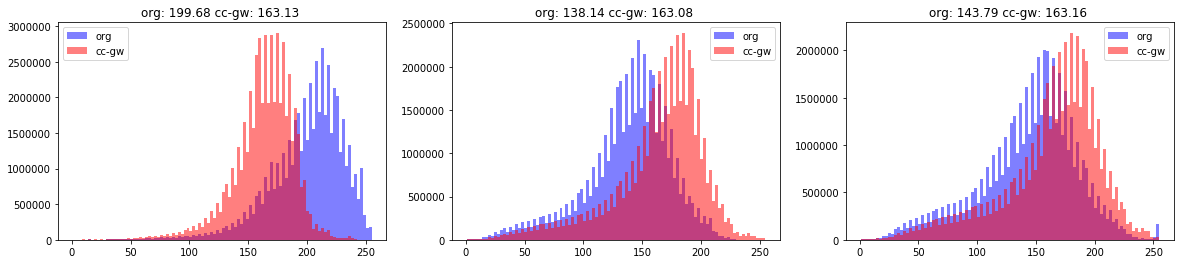

In [5]:
labels =['org', 'cc-gw']
remove=0
n_channel=3
plt.figure(figsize=(20,4))
for i in range(n_channel):
    title=''
    num_bins = np.ones([n_channel],dtype=np.uint8)*100
    for x,face_color,label in zip([ch_cat_src[i],ch_cat_src_gw[i]],['blue','red'],labels):
        x=np.array(x)
#         print(sum(x))
        if remove is not None:
            if type(remove) is int:
                x=x[x!=remove]
            else:
                x=x[x!=remove[i]]
#         print(x[:5])
        title+='{}: {:.2f} '.format(label,x.mean())
        plt.subplot(1,n_channel,i+1)
        n, bins, patches = plt.hist(x, num_bins[i], facecolor=face_color, label=label, alpha=0.5)
    plt.title(title)
    plt.legend()
plt.show()